# Parte A.p2

Esta parte consiste en el análisis explortatorio de los datos.

# 1. Configuraciones iniciales

## 1.1 Import de librerias

In [32]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from funpymodeling import status

from minepy import MINE

In [2]:
pd.set_option('display.max_columns', None)

## 1.2) Lectura de datos

In [3]:
data = pd.read_csv('../data/customer_dataset.csv', sep=',')

In [4]:
data.head()

,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed,fraudulent,emailDomain,emailProvider,customerIPAdress_checked,sameCity
0,18.0,pending,True,card,JCB 16 digit,Citizens First Banks,18,False,False,com,yahoo,short_address,yes
1,26.0,fulfilled,True,bitcoin,VISA 16 digit,Solace Banks,26,False,False,com,yahoo,short_address,no
2,45.0,fulfilled,False,card,VISA 16 digit,Vertex Bancorp,45,False,True,com,yahoo,long_address,no
3,23.0,fulfilled,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,23,False,True,com,yahoo,long_address,no
4,43.0,fulfilled,False,card,Mastercard,Vertex Bancorp,43,True,True,com,other,short_address,no


# 2) Variables categóricas

En esta seccion se analizaran 2 variables categóricas mediante la frecuencia de aparición de los datos

## 2.1) Método de pago

In [5]:
data['paymentMethodType'].value_counts()

paymentMethodType
card         242
apple pay     36
paypal        36
bitcoin       28
Name: count, dtype: int64

## 2.2) Transacciones Fraudulentas

In [6]:
data['fraudulent'].value_counts()

fraudulent
True     453
False    366
Name: count, dtype: int64

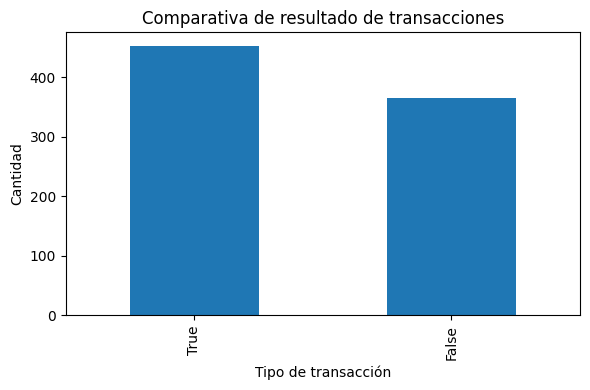

In [7]:

plt.figure(figsize=(6,4))
data['fraudulent'].value_counts().plot(kind='bar')
plt.title('Comparativa de resultado de transacciones')
plt.ylabel('Cantidad')
plt.xlabel('Tipo de transacción')
plt.tight_layout()
plt.show()

Se observa una proporción similar, lo cual es beneficioso para el modelo.

# 3) Análisis bivariado

Comparativa entre dos variables

## 3.1) Análisis de categórica vs categórica

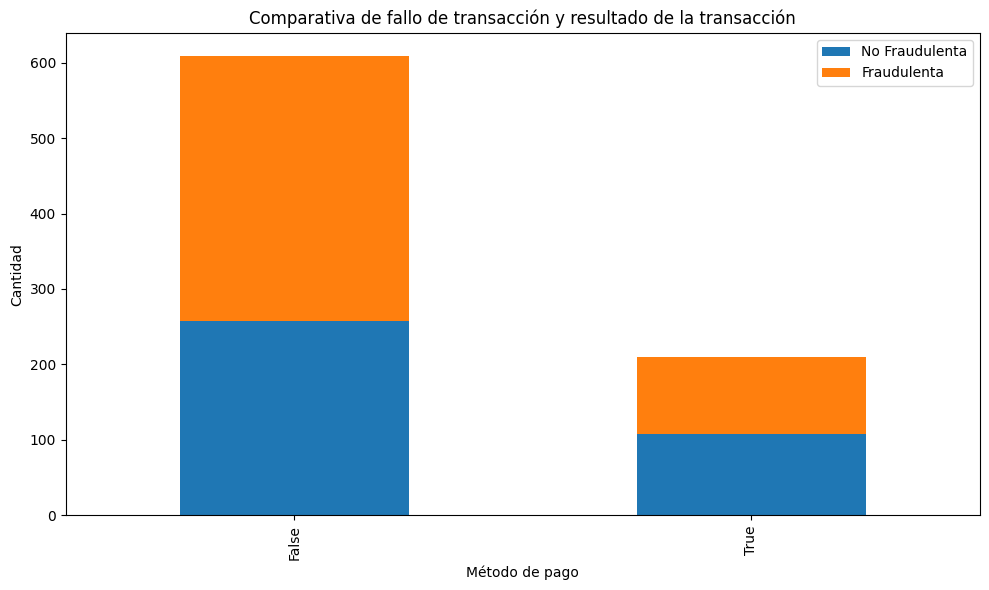

In [8]:
transaction_fraudulent = pd.crosstab(data['transactionFailed'], data['fraudulent'])

plt.figure(figsize=(10, 6))
transaction_fraudulent.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Comparativa de fallo de transacción y resultado de la transacción')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad')
plt.legend(['No Fraudulenta', 'Fraudulenta'])
plt.tight_layout()
plt.show()

Es bastante equilibrada la relación, por lo que no se puede obtener una conclusión unicamente de esta combinación de las dos variables.

Analisis de transacciones segun metodo de pago:

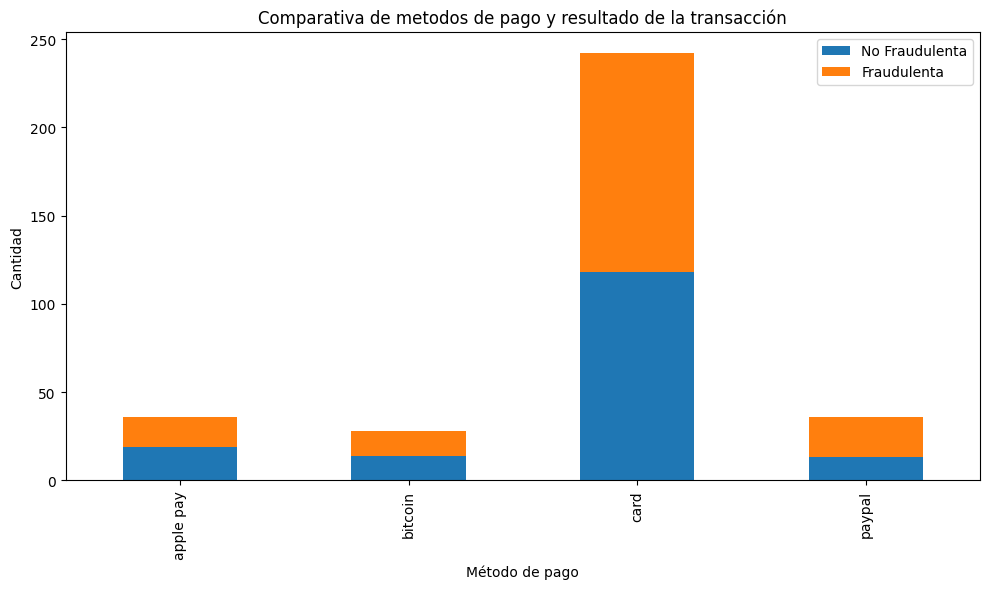

In [9]:
payments_fraudulent = pd.crosstab(data['paymentMethodType'], data['fraudulent'])

plt.figure(figsize=(10, 6))
payments_fraudulent.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Comparativa de metodos de pago y resultado de la transacción')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad')
plt.legend(['No Fraudulenta', 'Fraudulenta'])
plt.tight_layout()
plt.show()

Se observa que no se puede seccionar un grupo en particular como "Metodo Fraudulento", porque aun en los métodos poco utilizados mantienen la proporción general.

## 3.2) Análsis de categórica vs numérica

Comparativa fraudulent vs transactionAmount

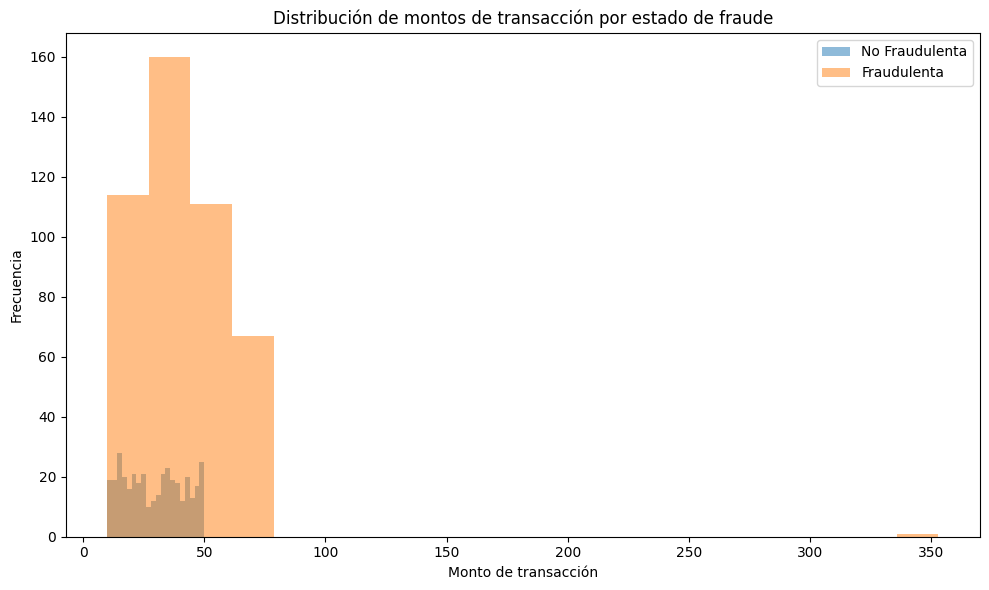

In [10]:
plt.figure(figsize=(10,6))
no_fraud=data[data['fraudulent']== False]['transactionAmount']
fraud=data[data['fraudulent']== True]['transactionAmount']

plt.hist(no_fraud, bins=20, alpha=0.5, label='No Fraudulenta')
plt.hist(fraud, bins=20, alpha=0.5, label='Fraudulenta')
plt.title('Distribución de montos de transacción por estado de fraude')
plt.xlabel('Monto de transacción')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

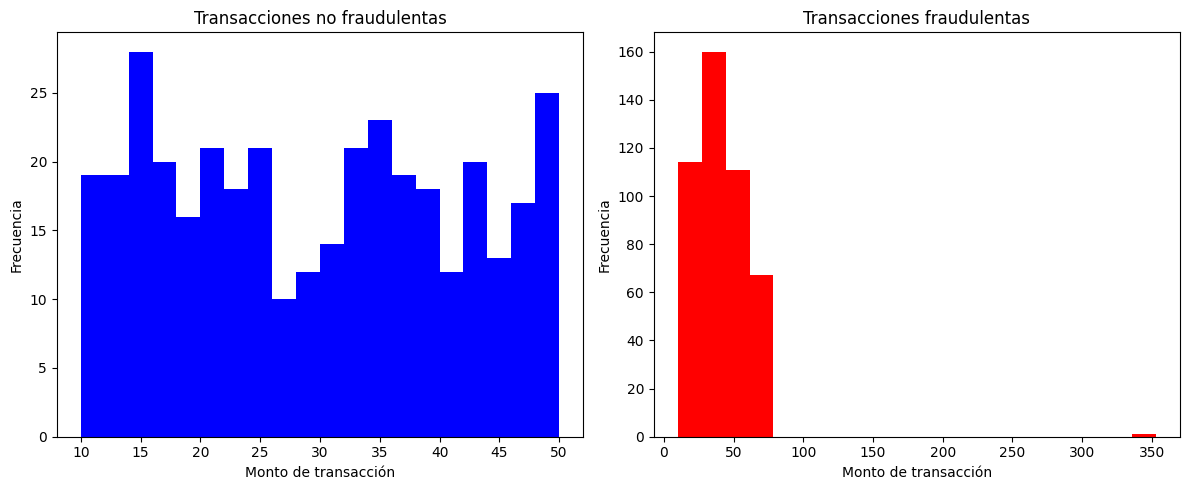

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(no_fraud, bins=20, color='blue')
plt.title('Transacciones no fraudulentas')
plt.xlabel('Monto de transacción')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(fraud, bins=20, color='red')
plt.title('Transacciones fraudulentas')
plt.xlabel('Monto de transacción')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

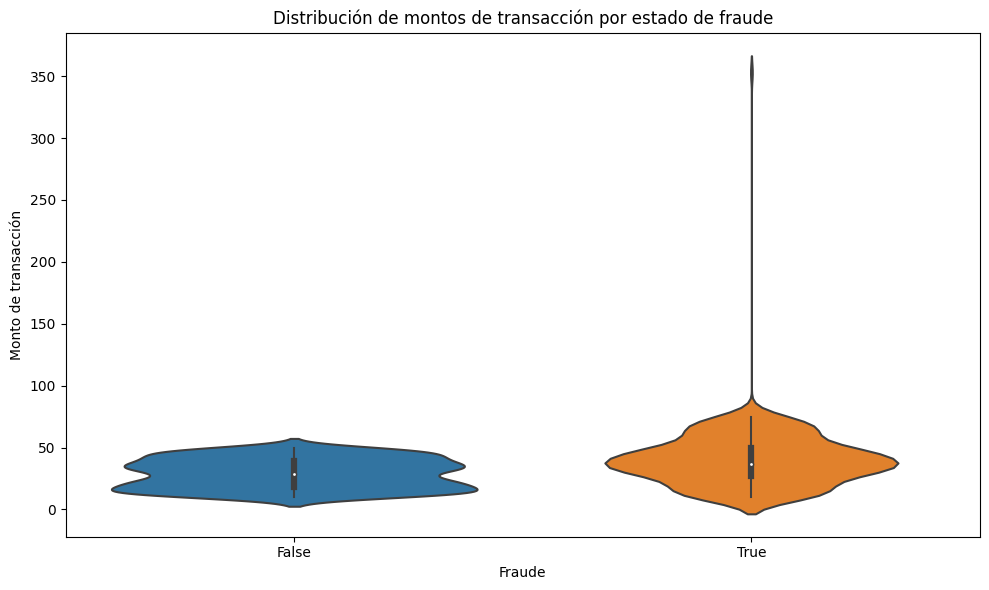

In [12]:
# Gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='fraudulent', y='transactionAmount', data=data)
plt.title('Distribución de montos de transacción por estado de fraude')
plt.xlabel('Fraude')
plt.ylabel('Monto de transacción')
plt.tight_layout()
plt.show()

Se elimina el outlier momentanemente para analizar mas facilmente. Pero ya tenemos un insight de que la transacción de mayor monto fue fraudulenta.

In [13]:
data_filtered = data[data['transactionAmount'] <= 250]

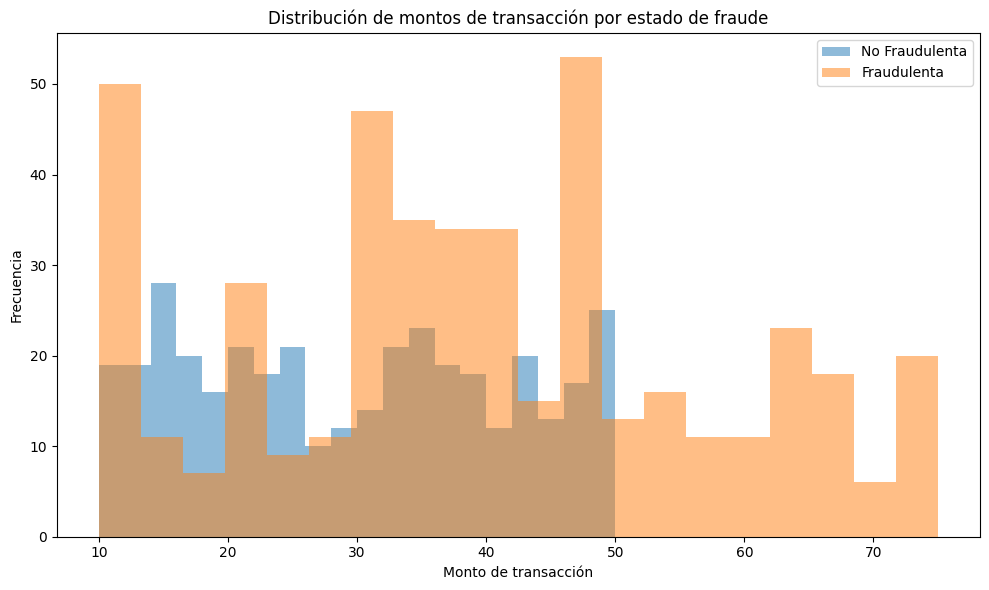

In [14]:
plt.figure(figsize=(10,6))
no_fraud=data_filtered[data_filtered['fraudulent']== False]['transactionAmount']
fraud=data_filtered[data_filtered['fraudulent']== True]['transactionAmount']

plt.hist(no_fraud, bins=20, alpha=0.5, label='No Fraudulenta')
plt.hist(fraud, bins=20, alpha=0.5, label='Fraudulenta')
plt.title('Distribución de montos de transacción por estado de fraude')
plt.xlabel('Monto de transacción')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

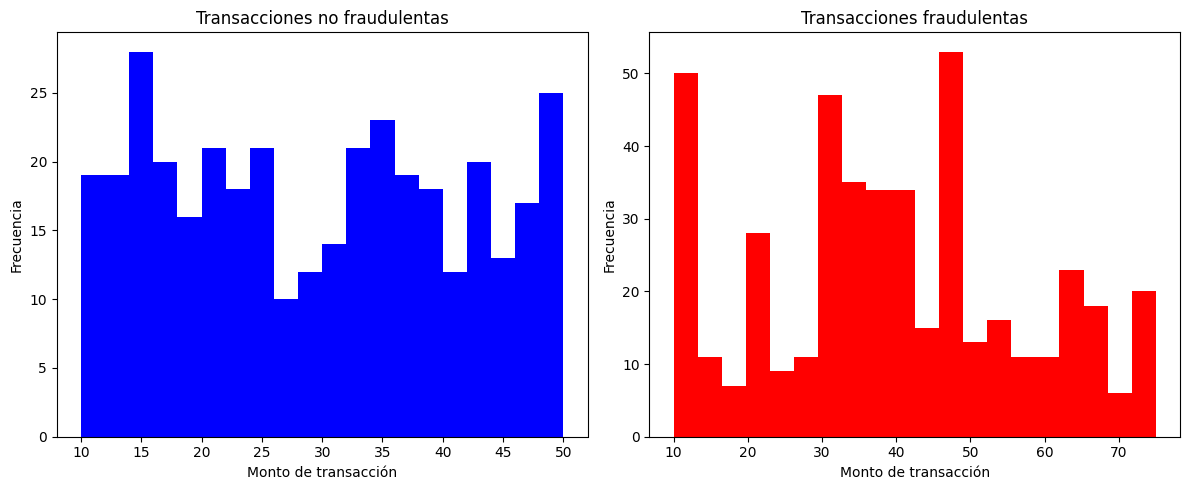

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(no_fraud, bins=20, color='blue')
plt.title('Transacciones no fraudulentas')
plt.xlabel('Monto de transacción')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(fraud, bins=20, color='red')
plt.title('Transacciones fraudulentas')
plt.xlabel('Monto de transacción')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

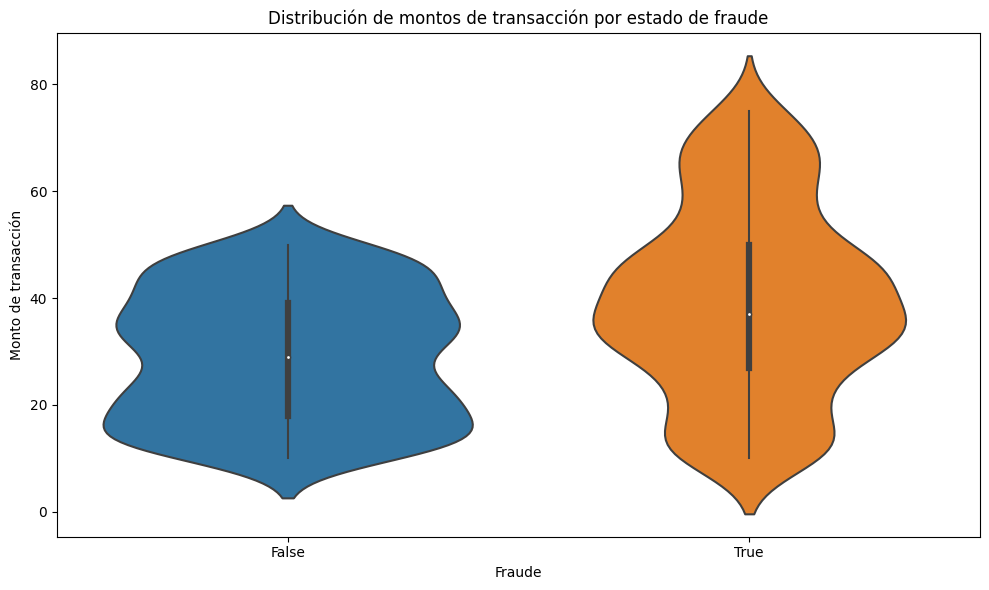

In [16]:
# Gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='fraudulent', y='transactionAmount', data=data_filtered)
plt.title('Distribución de montos de transacción por estado de fraude')
plt.xlabel('Fraude')
plt.ylabel('Monto de transacción')
plt.tight_layout()
plt.show()

Analsis de frecuencias en grupos de 10 a 20, 20 a 30, 30 a 40, 40 a 50. Ya que las transaciones no fraudulentas se mueven en estos rangos.

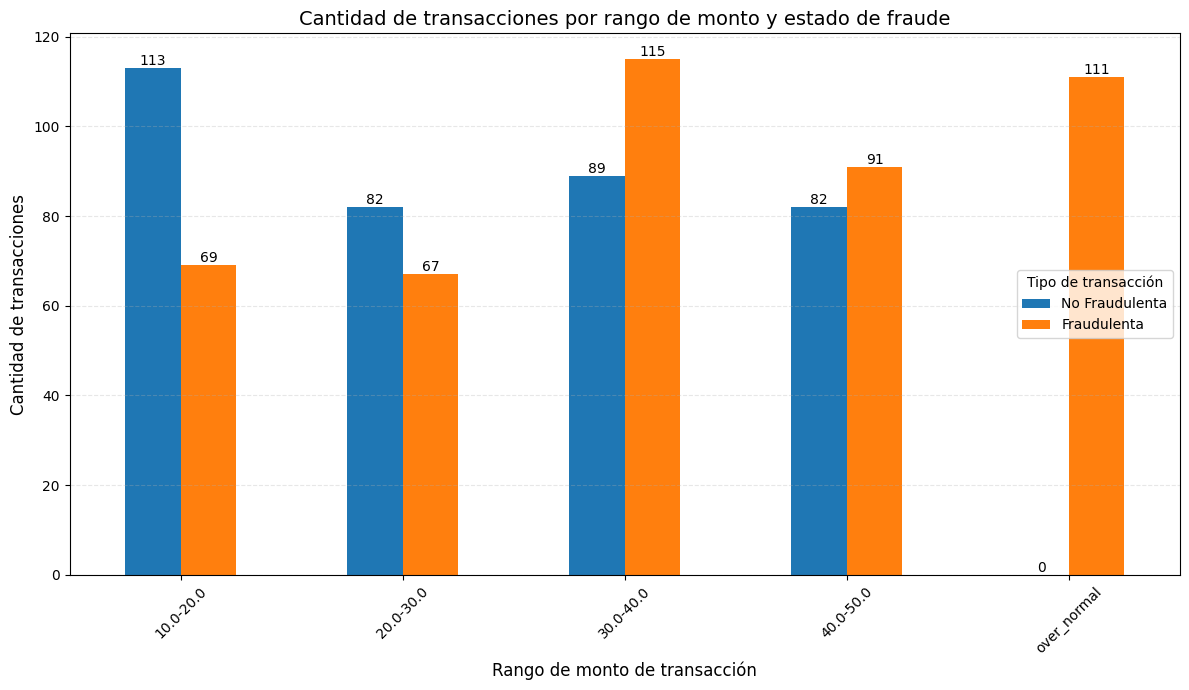

In [17]:

# Filtrar las transacciones no fraudulentas
no_fraud = data[data['fraudulent'] == False]['transactionAmount']

# Obtener mínimo y máximo de las transacciones no fraudulentas
min_normal = no_fraud.min()
max_normal = no_fraud.max()

# Crear 4 bins equidistantes entre el mínimo y máximo de las transacciones no fraudulentas
bins = np.linspace(min_normal, max_normal, 5)  # 5 puntos para crear 4 intervalos

# Añadir un valor muy grande para capturar todos los valores que exceden max_normal
bins_completos = np.append(bins, float('inf'))

# Crear etiquetas personalizadas
labels = [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)]
labels.append('over_normal')

# Aplicar cut() con los bins definidos
data['rango_transaccion'] = pd.cut(data['transactionAmount'], 
                                  bins=bins_completos, 
                                  labels=labels,
                                  include_lowest=True)

# Crear tabla de contingencia: filas=rangos, columnas=fraudulent
tabla_contingencia = pd.crosstab(data['rango_transaccion'], data['fraudulent'])

# Renombrar las columnas para la leyenda
tabla_contingencia.columns = ['No Fraudulenta', 'Fraudulenta']

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 7))
tabla_contingencia.plot(kind='bar', ax=plt.gca())

# Configurar el gráfico
plt.title('Cantidad de transacciones por rango de monto y estado de fraude', fontsize=14)
plt.xlabel('Rango de monto de transacción', fontsize=12)
plt.ylabel('Cantidad de transacciones', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Tipo de transacción')

# Añadir labels con la cantidad en cada barra
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

La conclusión de este analisis es el siguiente:
- Transacciones NO fraudulentas: estan distribuidas de mejor forma, no se forma una curva normal sino mas bien una donde todos los rangos buscan repetirse la misma cantidad de veces.
- Tranacciones fraudulentas: Existe 1 outlier muy marcado. Los valores que superan los 50 fueron todos fraudulentos (importante). Existen 3 picos primarios marcados, pero también se observa que la mayor cantidad de transacciones fraudulentas se encuentra entre un monto de 20 y 60. En el gráfico final se observa como los rangos de 10 a 50 no muestran de forma clara lo que se observa en el histograma, pero si se ve claramente como over_normal esta compuesto unicamente por transacciones fraudulentas

## 3.3) Análisis de numérica vs numérica

Correlación entre: orderAmount vs transactionAmount

c:\Users\usuario\Documents\GitHub\final_project\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\usuario\Documents\GitHub\final_project\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


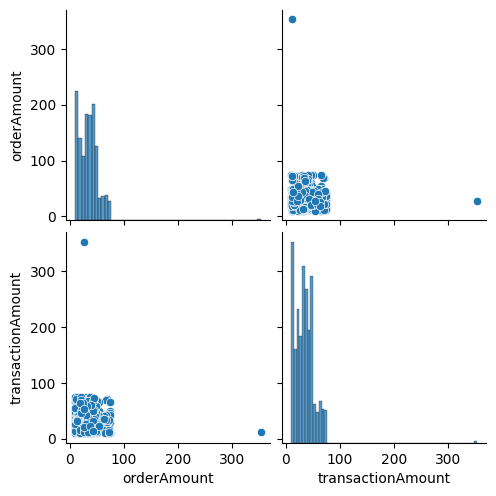

In [28]:
data_aux= data[['orderAmount', 'transactionAmount']].copy()
sns.pairplot(data_aux)

1. Distribuión de orderAmount:
- El histograma esta sesgado hacia la derecha
- La mayoria de las ordenes son de valores bajos
- Pocos pedidos de valores altos
- Los valores altos dentro de los bajos son los meos repetidos (cola hacia la derecha)

2. Distribución de transactionAmount:
- Situación similar a ordenAmount
- Existe una concentración significativa en un rango específico.

3. Relación entre orderAmount y transactionAmount:
- Parece haber una correlación positiva entre ambas variables.
- Existe un patrón de agrupamiento en grupos bajos.
- Existen valores atipicos que se alejan del patrón principal. Podrían ser transacciónes fraudulentas.

c:\Users\usuario\Documents\GitHub\final_project\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\usuario\Documents\GitHub\final_project\env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\usuario\Documents\GitHub\final_project\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\usuario\Documents\GitHub\final_project\env\lib\site-packages\seab

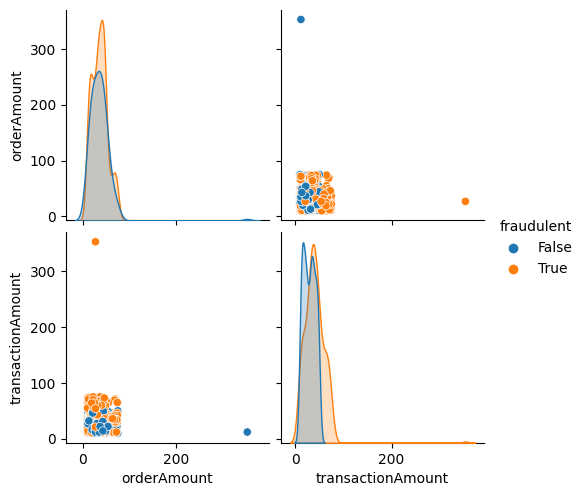

In [29]:
# Bonus del último punto:
data_aux_2= data[['orderAmount', 'transactionAmount', 'fraudulent']].copy()
sns.pairplot(data_aux_2, hue='fraudulent')

Uno de los outliers es fraudulento y otro no

## 3.4) Análisis de correlaciones no lineales

In [40]:
mine = MINE(alpha=0.6, c=15)
mine.compute_score(data['transactionAmount'], data['transactionFailed'])

mic = mine.mic()
mas = mine.mas()
mev = mine.mev()
mcn = mine.mcn()

print(f'MIC: {mic}')
print(f'MAS: {mas}')
print(f'MEV: {mev}')
print(f'MCN: {mcn}')

MIC: 0.08506599030129544
MAS: 0.07913872708581345
MEV: 0.08506599030129544
MCN: 5.754887502163469


1. MIC (Maxmial Information Coefficient): No existe relación entre transactionAmount y transactionFailed
2. MAS (Maximun Asymmetry Score): No hay evidencia de que una variable cause la otra.
3. MEV (Maximun Edge Value): las relaciones encontradas son consistentes
4. MCN (Minimun Cell Number): complejidad moderada-baja.